# ABCD Extraction - Part 1

### This file contains the extraction of grayscale image, threshold image and affected pixel area. The steps performed are:

1. Convert the input image to grayscale
2. Get a histogram of the image and find the Otsu threshold values 
3. Perform binary dilation and erosion on the input image 
4. Perform masking on the image


In [5]:
import os
import numpy as np
import imageio
import cv2
from scipy import misc
from scipy import ndimage
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg

Define the different functions needed for the extraction

In [6]:
def threshold(image, threshold):
    assert len(image.shape) == 2, "Must be grayscale image"
    thresh = np.zeros(image.shape)
    for rownum in range(len(image)):
        for colnum in range(len(image[rownum])):    
            if image[rownum][colnum] > threshold:
                thresh[rownum][colnum] = 0 
            else:
                thresh[rownum][colnum] = 255
    return thresh

def getHistGray(image):
    assert len(image.shape) == 2, "Must be grayscale image"
    hist = np.zeros(255)
    for row in image:
        for col in row:
            hist[int(col)] += 1
    return hist

def otsu(image):
    assert len(image.shape) == 2, "Must be grayscale image"
    th = _getOtsuThreshold(image)
    return threshold(image, th)
    
    
def _getOtsuThreshold(image):
    #import measure as m
    s = 0;
    histogram = getHistGray(image)
    for i in range(len(histogram)):
        s += i * histogram[i]
    sumB = 0
    wB = 0
    wF = 0
    mB = None
    mF = None
    m = 0.0
    between = 0.0
    threshold1 = 0.0
    threshold2 = 0.0
    total = len(image.ravel())
    for i in range(len(histogram)):
        wB += histogram[i]
        if wB == 0:
            continue;
        wF = total - wB
        if (wF == 0):
            break
        sumB += i * histogram[i]
        mB = sumB / wB
        mF = (s - sumB) / wF
        between = wB * wF * ((mB - mF) ** 2)
        if between >= m :
            threshold1 = i
            if between > m :
                threshold2 = i
            m = between
    return ( threshold1 + threshold2 ) / 2.0;


def np_binary_erosion(input_array, structure=np.ones((3,3)).astype(np.bool)):
    
    rows, cols = input_array.shape
     
    pad_shape = (
        input_array.shape[0] + structure.shape[0] - 1, 
        input_array.shape[1] + structure.shape[1] - 1)
    input_pad_array = np.zeros(pad_shape).astype(np.bool)
    input_pad_array[1:rows+1,1:cols+1] = input_array
    binary_erosion = np.zeros(pad_shape).astype(np.bool)
    struc_mask = structure.astype(np.bool)
    for row in range(len(image)):
        for col in range(len(image[row])):
            binary_erosion[row+1,col+1] = np.min(
                input_pad_array[row:row+3, col:col+3][struc_mask])
    return binary_erosion[1:rows+1,1:cols+1]

def np_binary_dilation(img):
    out=np.array(img)
    h=img.shape[0]
    w=img.shape[1]
    D=np.zeros((h,w),dtype=int)
    for i in np.arange(2,h-2):
            for j in np.arange(2,w-2):
                a=img[i][j]
                if a.any():
                    out[i+1][j]=255
                    out[i][j+1]=255
    return out



def masking(image,mask):
    new_img=np.array(image)
    for row in range(len(image)):
        for col in range(len(image[row])):
            if mask[row,col]==0:
                new_img[row,col]=0
            if mask[row,col]==1:
                new_img[row,col]=image[row,col]
    return new_img

def convertToGreyScale(image):
    
    def getWeightedAvg(pixel):
        return 0.299*pixel[0] + 0.587*pixel[1] + 0.114*pixel[2]        
        
    grey = np.zeros(image.shape[0:-1])
    for rownum in range(len(image)):
        for colnum in range(len(image[rownum])):
                grey[rownum][colnum] = getWeightedAvg(image[rownum][colnum])
        
    return grey


C:\Users\KANNAN~1\AppData\Local\Temp/ipykernel_8104/3360581599.py:61: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  def np_binary_erosion(input_array, structure=np.ones((3,3)).astype(np.bool)):


This shows the input image, threshold image , grayscale image and the final image for a sample benign image

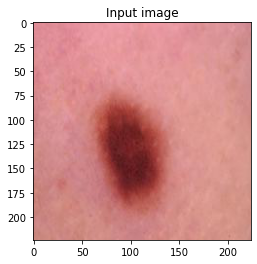

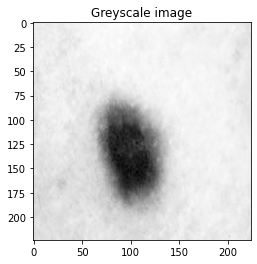

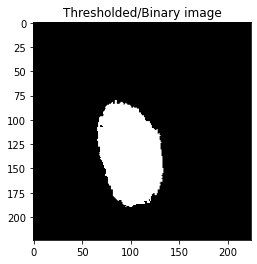

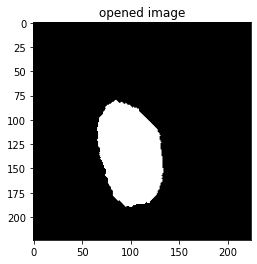

Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


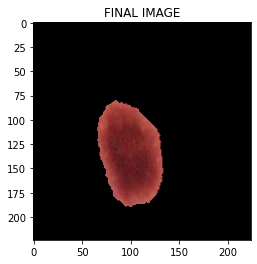

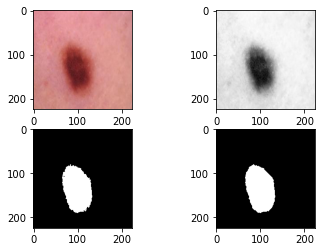

In [8]:
image = imageio.imread('final/benign/1 (28).jpg')
plt.title("Input image")
plt.imshow(image)
plt.show()
        
grey = convertToGreyScale(image)
plt.title("Greyscale image")
plt.imshow(grey,cmap=cm.Greys_r)
plt.show()

thresh = otsu(grey)
plt.title("Thresholded/Binary image")
plt.imshow(thresh, cmap = cm.Greys_r)
plt.show()
    
dilimg=ndimage.binary_dilation(thresh)
for x in range(25):
    dilimg=ndimage.binary_dilation(dilimg)
erimg=ndimage.binary_erosion(dilimg)
for x in range(25):
    erimg=ndimage.binary_erosion(erimg)
plt.title("opened image")
plt.imshow(erimg,cmap=cm.Greys_r)
plt.show()
        
imageio.imwrite('threshold.jpg', thresh)

new_img=masking(image,erimg)
plt.title("FINAL IMAGE")
plt.imshow(new_img)
plt.show()
imageio.imwrite('Result.jpg', new_img)
    

fig=plt.figure()
ax1=fig.add_subplot(2,2,1)
ax1.imshow(image)
ax2=fig.add_subplot(2,2,2)
ax2.imshow(grey,cmap=cm.Greys_r)
ax3=fig.add_subplot(2,2,3)
ax3.imshow(thresh,cmap=cm.Greys_r)
ax4=fig.add_subplot(2,2,4)
ax4.imshow(erimg,cmap=cm.Greys_r)
plt.show()    